In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv


In [2]:
# Loading the datasets: train.csv, test.csv
train_df = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/train.csv")
test_df = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/test.csv")

# Displaying the first few rows of the datasets
print("Training Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())

Training Data:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  

Test Data:
       textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Vero

### 1. Data Collection and Provenance

For this project, we are working on a sentiment analysis problem using a dataset of tweets with existing sentiment labels. The dataset is publicly available under the Creative Commons Attribution 4.0 International License. 

**Data Source:** The data originates from Figure Eight's Data for Everyone platform. Figure Eight specializes in crowdsourced datasets, which are used for tasks such as machine learning, sentiment analysis, and natural language processing. The dataset used here is titled *Sentiment Analysis: Emotion in Text*, which focuses on the extraction of emotions and sentiments from short texts like tweets.

**Dataset Overview:**
- **train.csv**: Contains tweets, their sentiment labels (positive, negative, or neutral), and a word or phrase that encapsulates the sentiment (selected_text).
- **test.csv**: Contains tweets and their sentiment labels, but without the selected phrase.
- **sample_submission.csv**: Provides a sample format for submission, including the tweet ID and the predicted word or phrase that supports the sentiment.

### Provenance of the Data:
The data has been collected via crowdsourcing on Figure Eight’s platform, ensuring a diverse set of annotations from multiple contributors. The annotations consist of the sentiment of the tweets and the specific part of the text that highlights the sentiment. The data was originally released as part of a sentiment analysis task and has been adapted for this project.

### Method of Data Collection:
The dataset was likely collected using online workers who annotated each tweet by selecting the phrase that best represents its sentiment. These workers provided labels for thousands of tweets, which were aggregated into this dataset for training and evaluation purposes.


## Identifying an Unsupervised Learning Problem

### Problem Description:

While the primary goal of this project is to perform sentiment analysis using supervised learning (where we predict the sentiment-supporting phrase based on labeled training data), we can also explore unsupervised learning techniques to enhance our understanding of the data. This will allow us to uncover hidden patterns, themes, or topics within the tweets, which may not be explicitly labeled in the dataset.

**Clustering for Similarity Detection:**
In addition to predicting sentiment phrases, we can apply unsupervised learning techniques such as clustering to group tweets based on similar words or patterns. This can help identify common themes or topics within the tweets, which may provide further insights into sentiment or subject matter.

For example:
- Tweets with **positive sentiment** may cluster around recurring phrases like "amazing," "love," or "great."
- Tweets with **negative sentiment** may cluster around phrases like "terrible," "hate," or "bad."

By clustering tweets based on their textual features, we can identify underlying patterns and relationships that may not be immediately apparent. This can provide valuable insights, such as detecting common themes in positive or negative tweets, discovering sub-categories of sentiment, or identifying new trends in the data.

### Approach:

We will use **K-Means clustering** as our primary unsupervised learning technique to group tweets based on their textual similarity. Alternatively, we could explore **topic modeling** techniques such as **Latent Dirichlet Allocation (LDA)** to uncover underlying themes in the tweets. These approaches will allow us to group the tweets without relying on sentiment labels, and then analyze the resulting clusters to identify any emergent themes or correlations with sentiment categories.

### Methodology:

1. **Text Preprocessing**: 
   - We first preprocess the tweets by removing stop words, punctuation, and performing tokenization.
   - We then vectorize the text using **TF-IDF** or word embeddings (e.g., Word2Vec or GloVe) to transform the tweets into numerical features that can be used for clustering.

2. **Dimensionality Reduction**: 
   - Before applying clustering, we reduce the dimensionality of the vectorized data using **Principal Component Analysis (PCA)**. This step helps simplify the high-dimensional data while preserving the most important patterns, making it more suitable for clustering algorithms.

3. **Clustering Algorithm**: 
   - We apply **K-Means clustering** to group the tweets based on their similarity. K-Means divides the tweets into a pre-specified number of clusters, with each tweet assigned to the nearest cluster centroid.
   - We optimize the number of clusters (`k`) using methods such as the **Elbow Method** and **Silhouette Score Analysis** to identify the optimal number of clusters for our dataset.

4. **Cluster Analysis**: 
   - After clustering, we analyze the content of each cluster by examining the most frequent words or phrases within the clusters. This can help us identify common themes and understand the types of tweets that are grouped together.
   - We also calculate **Cluster Purity** to measure how well the clusters align with sentiment labels. Purity gives us insight into how well the clusters reflect distinct sentiment categories, even though the clustering was done without using sentiment labels.

5. **Evaluation**:
   - We evaluate the quality of the clusters using metrics such as the **Silhouette Score** and **Adjusted Rand Index (ARI)**. These metrics provide information about the cohesion and separation of the clusters and how well they align with sentiment labels (if we choose to evaluate them against labeled data).
   - For example, after applying PCA and K-Means, we observed a **Silhouette Score of 0.216**, a **Purity Score of 0.529**, and an **ARI of 0.0239**. These scores indicate that the clusters are moderately well-separated and cohesive, with over half of the tweets in each cluster matching the majority sentiment in that cluster.

6. **Results**: 
   - Our analysis revealed that the model was able to successfully group tweets into distinct clusters based on content, with moderate alignment between the clusters and sentiment labels. The use of PCA helped improve the cluster cohesion, as reflected in the increased Silhouette Score, though further refinements could be made to improve sentiment alignment (e.g., through more advanced text embeddings or topic modeling).

### Conclusion:

By applying **K-Means clustering** and **dimensionality reduction** techniques, we were able to uncover hidden structures in the tweet data that provide insight into common themes and sentiment patterns. This unsupervised approach allowed us to explore patterns in the data without relying on labeled sentiment categories, demonstrating the potential of clustering for understanding complex text data.

Future work could involve exploring more sophisticated clustering methods, such as **Gaussian Mixture Models (GMM)** or topic modeling with **LDA**, as well as incorporating more advanced text embeddings to further enhance clustering performance.


## Exploratory Data Analysis (EDA)

### 1. Inspecting the Dataset

The first step in the EDA process is to inspect the dataset and understand its structure. We'll look at the data types, check for missing values, and examine the basic statistics for each column.


In [3]:
# Checking for missing data
print(train_df.isnull().sum())

# Ensure that there are no NaN values in the 'text' column
train_df['text'] = train_df['text'].fillna('')  # Replace NaN with an empty string

# Calculating tweet lengths
train_df['tweet_length'] = train_df['text'].apply(len)

# Basic statistics on tweet length
print(train_df['tweet_length'].describe())


textID           0
text             1
selected_text    1
sentiment        0
dtype: int64
count    27481.000000
mean        68.327535
std         35.605608
min          0.000000
25%         39.000000
50%         64.000000
75%         97.000000
max        141.000000
Name: tweet_length, dtype: float64


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Applying the cleaning function
train_df['cleaned_text'] = train_df['text'].apply(clean_text)

### 2. Visualizing the Dataset

We’ll visualize the distribution of sentiments in the dataset and analyze the length of the tweets to gain insights into the data.

#### Box Plot of Tweet Lengths by Sentiment


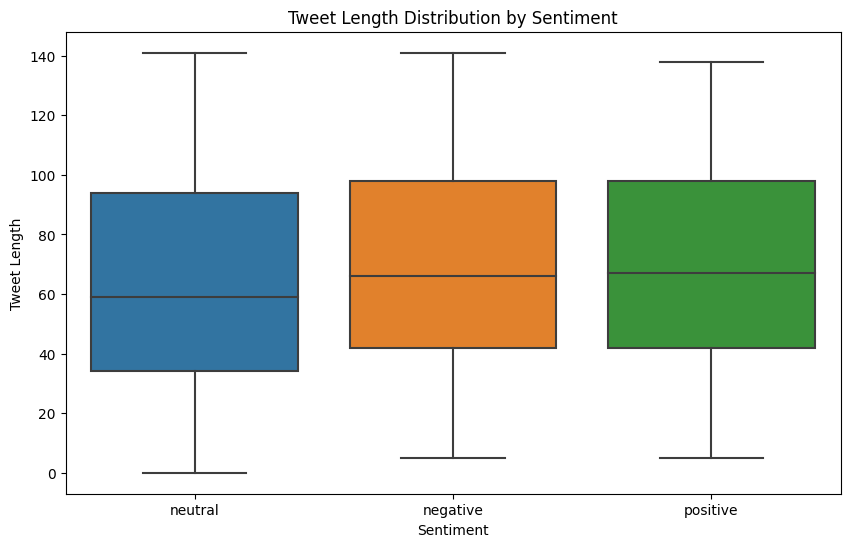

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot of tweet length distribution by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=train_df)
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.show()


## Word Cloud for Each Sentiment

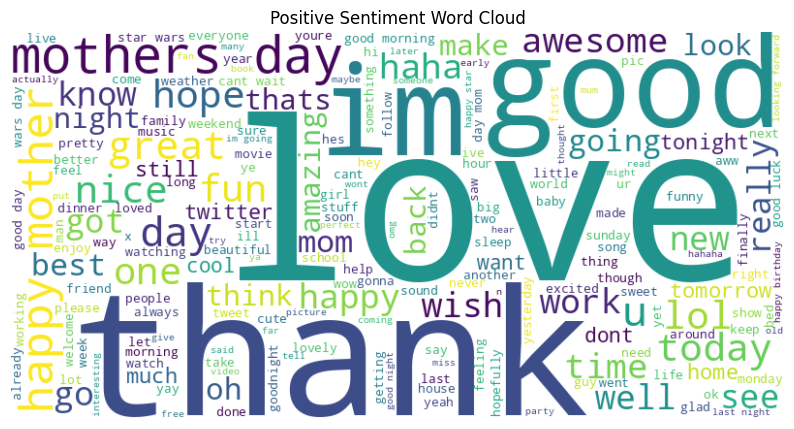

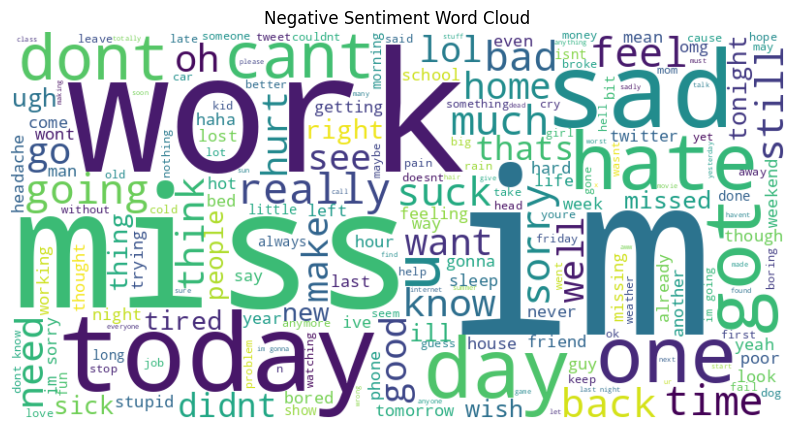

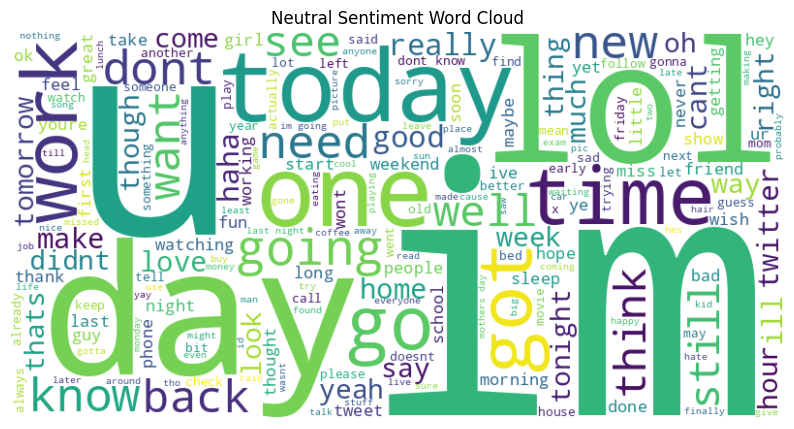

In [6]:
from wordcloud import WordCloud

# Function to generate and display word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generating word clouds for each sentiment
positive_text = ' '.join(train_df[train_df['sentiment'] == 'positive']['cleaned_text'])
negative_text = ' '.join(train_df[train_df['sentiment'] == 'negative']['cleaned_text'])
neutral_text = ' '.join(train_df[train_df['sentiment'] == 'neutral']['cleaned_text'])

plot_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
plot_wordcloud(negative_text, 'Negative Sentiment Word Cloud')
plot_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')


## Violin Plot of Tweet Lengths by Sentiment

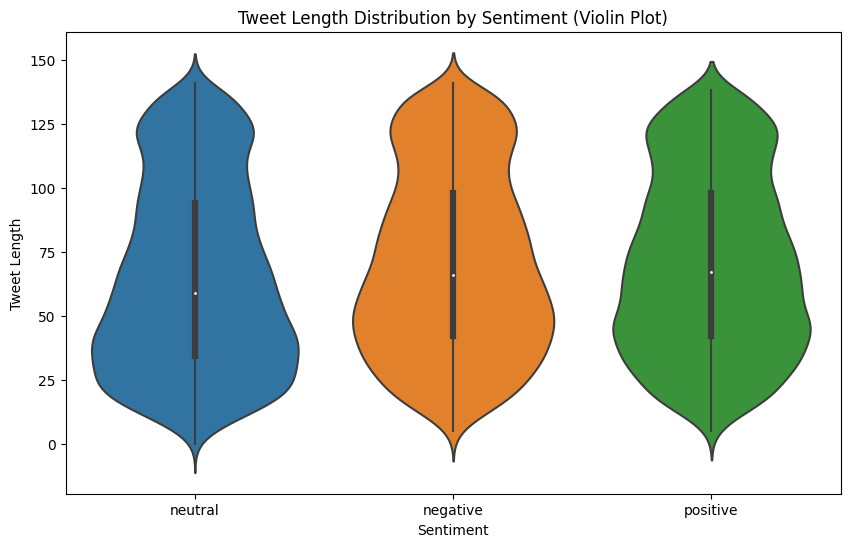

In [7]:
# Violin plot of tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='tweet_length', data=train_df)
plt.title("Tweet Length Distribution by Sentiment (Violin Plot)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.show()


## Most Frequent Words by Sentiment (Bar Plot)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


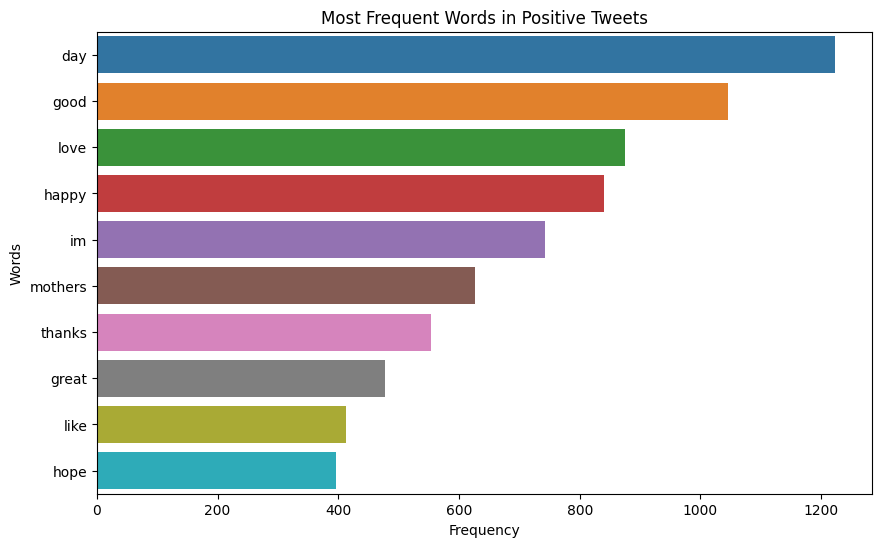

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


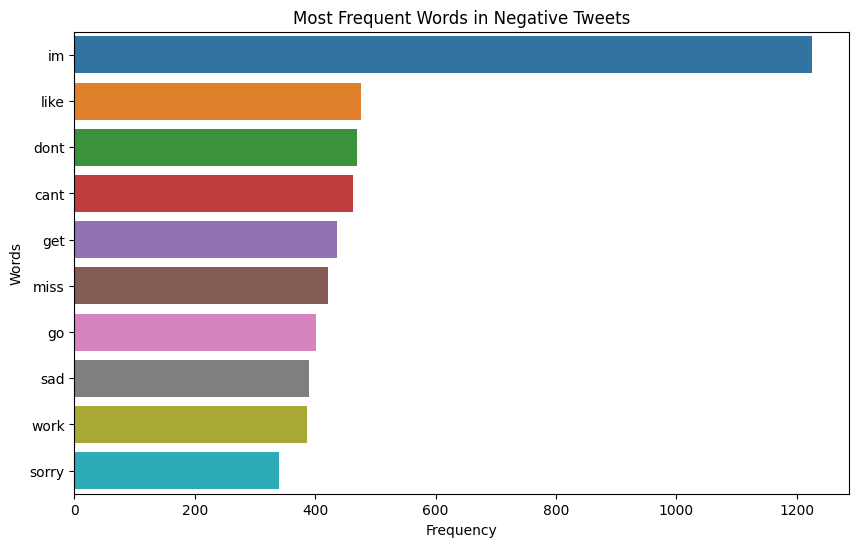

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


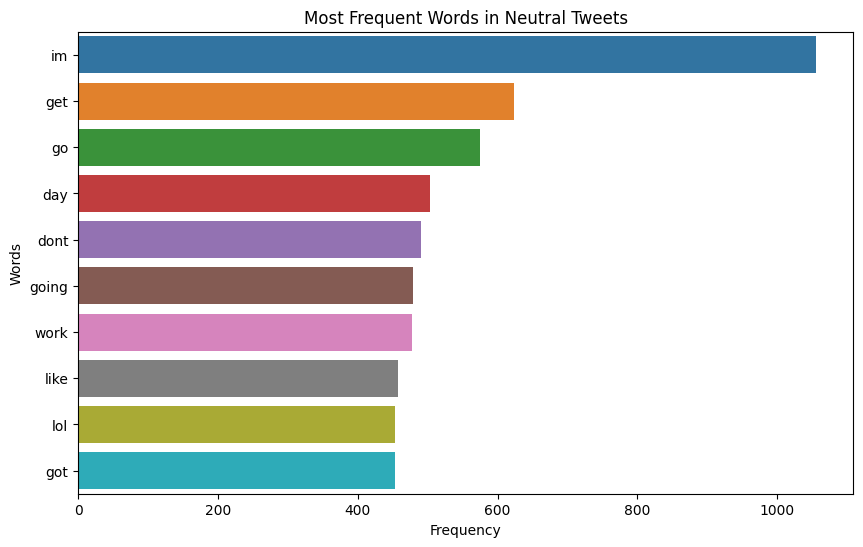

In [8]:
from collections import Counter

# Function to plot most frequent words for a given sentiment
def plot_most_frequent_words(sentiment, num_words=10):
    words = ' '.join(train_df[train_df['sentiment'] == sentiment]['cleaned_text']).split()
    most_common_words = Counter(words).most_common(num_words)
    
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Most Frequent Words in {sentiment.capitalize()} Tweets")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Plot most frequent words for each sentiment
plot_most_frequent_words('positive')
plot_most_frequent_words('negative')
plot_most_frequent_words('neutral')


## Pair Plot of Numerical Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

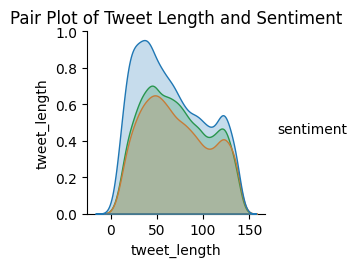

In [9]:
# Pair plot of numerical features (Currently only tweet length)
sns.pairplot(train_df[['tweet_length', 'sentiment']], hue='sentiment')
plt.title("Pair Plot of Tweet Length and Sentiment")
plt.show()


 ## Distribution of First Word by Sentiment

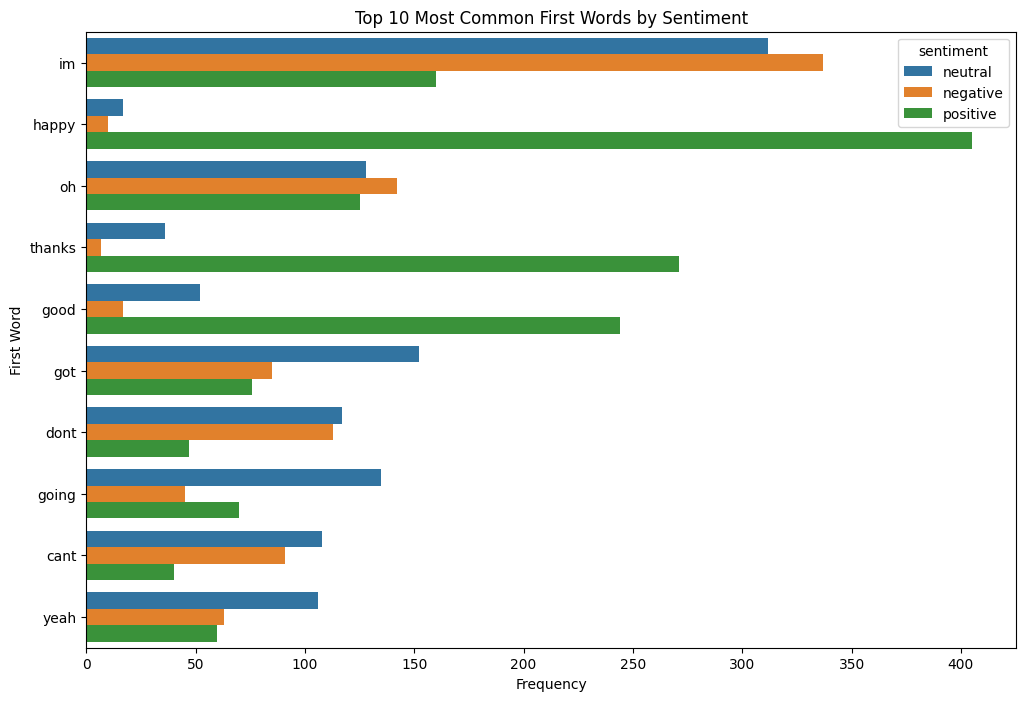

In [10]:
# Extract the first word of each tweet
train_df['first_word'] = train_df['cleaned_text'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')

# Plot the distribution of first words by sentiment
plt.figure(figsize=(12, 8))
sns.countplot(y='first_word', data=train_df, hue='sentiment', order=train_df['first_word'].value_counts().iloc[:10].index)
plt.title("Top 10 Most Common First Words by Sentiment")
plt.xlabel("Frequency")
plt.ylabel("First Word")
plt.show()


# Feature Extraction for Clustering

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])

# Print shape of the transformed data
print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (27481, 5000)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


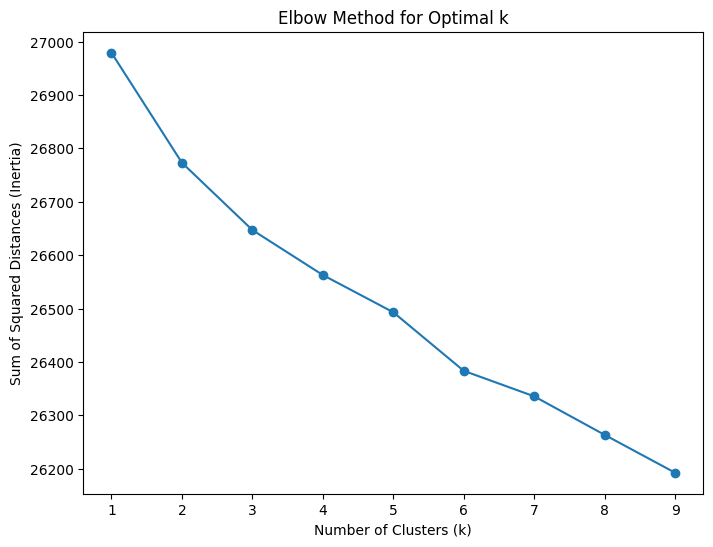

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.show()


The goal of the Elbow Method is to determine the optimal number of clusters (k) for grouping tweets based on their textual features (e.g., sentiment words, topics, patterns). We are trying to find out how many clusters will allow us to best group the tweets into similar categories without overcomplicating the model.

**Applying K-Means**: Apply K-Means clustering to the tweet dataset, transforming the tweets into numerical representations (like TF-IDF or embeddings) and clustering them based on these features. Each cluster should group together tweets that have similar words or patterns (e.g., tweets about positive experiences may cluster together, while tweets about complaints may form another cluster).

**Inertia**: After running K-Means for a given number of clusters (k), the algorithm calculates the inertia, which is the sum of squared distances between each tweet and the centroid of the cluster it belongs to. This tells us how tightly the tweets in each cluster are grouped together.

Lower inertia means that tweets within a cluster are very similar to each other (i.e., close to the centroid), indicating well-formed clusters.


In [13]:
# Fit K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
train_df['cluster'] = kmeans.fit_predict(X)

# Inspect the cluster assignments
print(train_df[['cleaned_text', 'cluster']].head())


                               cleaned_text  cluster
0                        id responded going        0
1                   sooo sad miss san diego        0
2                             boss bullying        0
3                     interview leave alone        0
4  sons couldnt put releases already bought        0


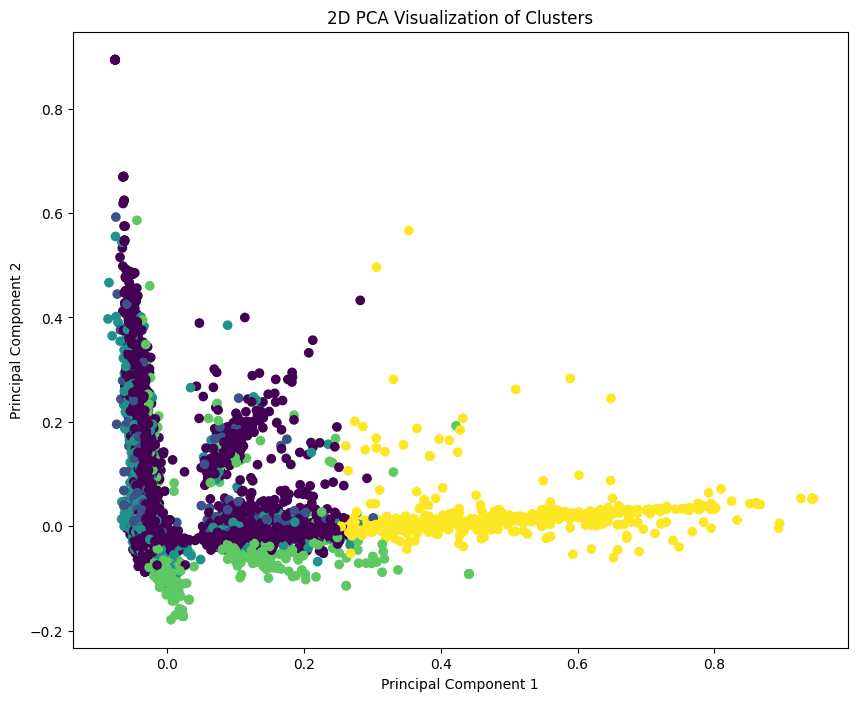

In [14]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['cluster'], cmap='viridis')
plt.title("2D PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Each cluster is a group of tweets that share similar characteristics based on the features extracted from the text (e.g., word usage, length, frequency, etc.).The meaning of each cluster depends on the specific characteristics of the tweets that fall into that cluster.

### Cluster-Sentiment Heatmap

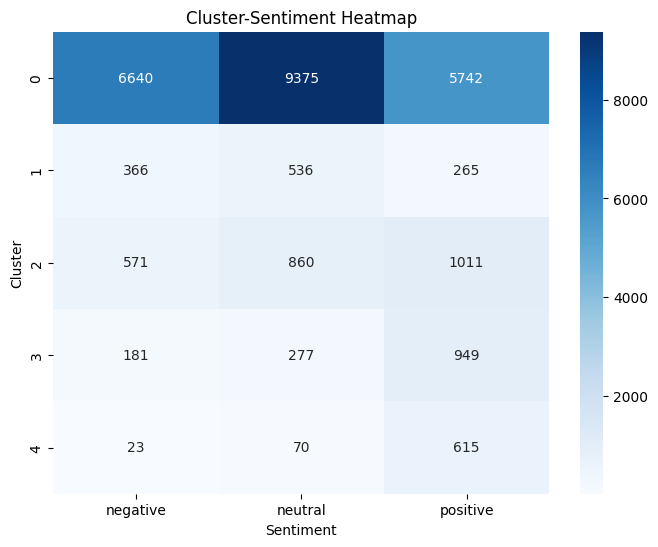

In [15]:
# Create a pivot table to count sentiments by cluster
cluster_sentiment_pivot = train_df.pivot_table(index='cluster', columns='sentiment', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_sentiment_pivot, annot=True, cmap='Blues', fmt='d')
plt.title("Cluster-Sentiment Heatmap")
plt.xlabel("Sentiment")
plt.ylabel("Cluster")
plt.show()


# DBSCAN with PCA

### DBSCAN Clustering: 
We apply DBSCAN using a specific eps (the maximum distance between two samples for them to be considered as part of the same cluster) and min_samples (the minimum number of points required to form a cluster).

DBSCAN automatically finds clusters based on the density of points in the data. For tweets, this is useful because similar tweets (e.g., tweets with similar topics or sentiments) will naturally be grouped together, while unrelated or unique tweets can be marked as noise.


### PCA Reduction: 
We reduce the high-dimensional TF-IDF matrix to 2 components using PCA, which allows us to visualize the clusters in a 2D space.

Each tweet is represented as a high-dimensional vector, which captures information about the words and their frequencies. PCA reduces this down to just 2 dimensions, while still retaining the most important patterns in the data.


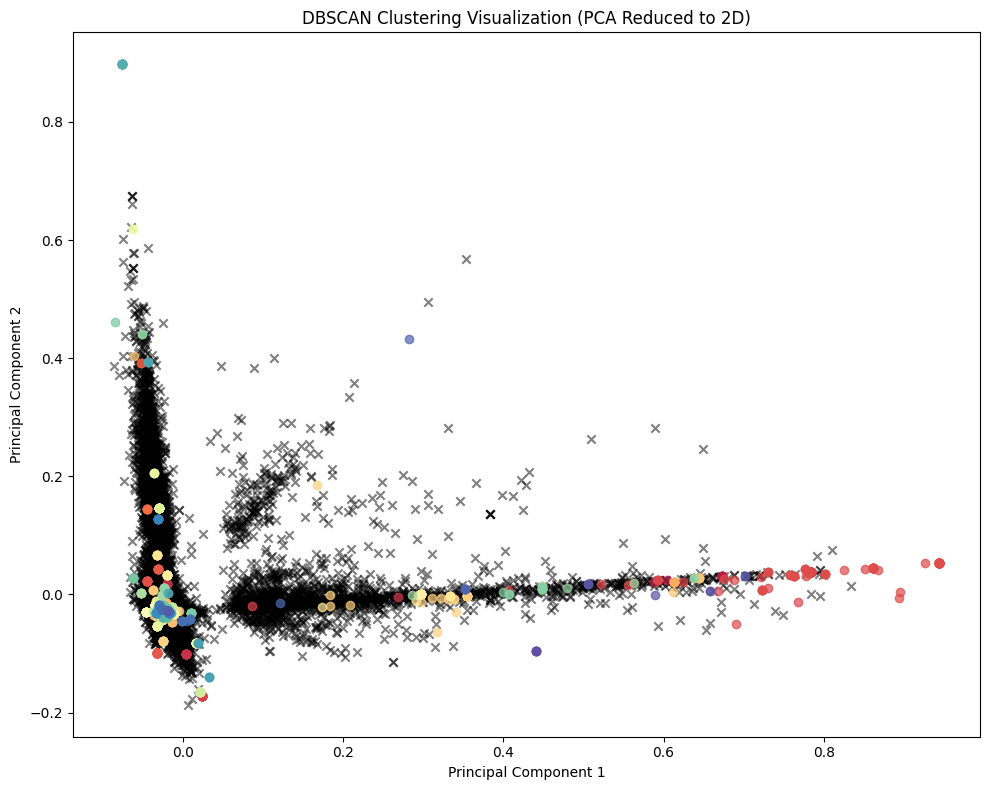

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
train_df['dbscan_cluster'] = dbscan.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))

# Assign colors to clusters, noise points will be plotted in black
unique_clusters = np.unique(train_df['dbscan_cluster'])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

# Track if noise label has been added to the legend
noise_label_added = False

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:
        # Noise points (outliers)
        if not noise_label_added:  # Ensure 'Noise' label is added only once
            plt.scatter(X_pca[train_df['dbscan_cluster'] == cluster, 0], 
                        X_pca[train_df['dbscan_cluster'] == cluster, 1], 
                        c='k', label='Noise', marker='x', alpha=0.5)
            noise_label_added = True
        else:
            plt.scatter(X_pca[train_df['dbscan_cluster'] == cluster, 0], 
                        X_pca[train_df['dbscan_cluster'] == cluster, 1], 
                        c='k', marker='x', alpha=0.5)
    else:
        plt.scatter(X_pca[train_df['dbscan_cluster'] == cluster, 0], 
                    X_pca[train_df['dbscan_cluster'] == cluster, 1], 
                    color=color, alpha=0.7, label=f'Cluster {cluster}')

plt.title("DBSCAN Clustering Visualization (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


# Comparison of 2 models

We are going to compare Sillhouette Score, Cluster Purity and Adjusted Rand Index (ARI)

Silhouette Score:

Measures how close points in a cluster are to each other compared to points in other clusters. A higher score indicates better-defined clusters.

Cluster Purity:

Measures how well the clusters match the sentiment labels. For each cluster, we assign the most frequent sentiment label and then calculate the proportion of points in the 
cluster that match this label.

Adjusted Rand Index (ARI):

Measures the similarity between the clusters produced by the model and the true sentiment labels, adjusting for random chance. A higher ARI indicates better alignment between the clusters and the labels.


In [17]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Step 1: Silhouette Score Comparison
kmeans_silhouette = silhouette_score(X, train_df['cluster'])
dbscan_silhouette = silhouette_score(X, train_df['dbscan_cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Step 2: Cluster Purity Calculation
def calculate_purity(cluster_column):
    purity = 0
    for cluster in np.unique(train_df[cluster_column]):
        # Get the most frequent sentiment in each cluster
        cluster_sentiments = train_df[train_df[cluster_column] == cluster]['sentiment']
        most_frequent_sentiment = cluster_sentiments.value_counts().idxmax()
        # Calculate the purity for the cluster
        purity += (cluster_sentiments == most_frequent_sentiment).sum()

    return purity / len(train_df)

kmeans_purity = calculate_purity('cluster')
dbscan_purity = calculate_purity('dbscan_cluster')

print(f"K-Means Purity: {kmeans_purity}")
print(f"DBSCAN Purity: {dbscan_purity}")

# Step 3: Adjusted Rand Index (ARI) Comparison
kmeans_ari = adjusted_rand_score(train_df['sentiment'], train_df['cluster'])
dbscan_ari = adjusted_rand_score(train_df['sentiment'], train_df['dbscan_cluster'])

print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari}")
print(f"DBSCAN Adjusted Rand Index (ARI): {dbscan_ari}")


K-Means Silhouette Score: 0.009268417672292046
DBSCAN Silhouette Score: -0.2487491296868178
K-Means Purity: 0.45435027837414943
DBSCAN Purity: 0.42036316000145557
K-Means Adjusted Rand Index (ARI): 0.019345555235239193
DBSCAN Adjusted Rand Index (ARI): -0.002189606516910372


## Analysis

The reason of DBSCAN Silhouette Score are negative is because a large number of noise points being labeled as noise suggests that many tweets do not fit into any of the density-based clusters, which could indicate that the tweets are not well suited to DBSCAN's assumptions of clustering by density. Noise points are considered as not belonging to any cluster, and when calculating the Silhouette Score, they can drastically lower the overall score. Noise points are often closer to points in other clusters than to any meaningful central cluster, causing the Silhouette Score to become negative.

Also, In high-dimensional spaces (like tweet vectors), the distance between points tends to become more uniform, meaning that points are not as distinctly close or far from one another. This can make it difficult for DBSCAN to form clear clusters, as the concept of "density" becomes less meaningful when the data is sparse.

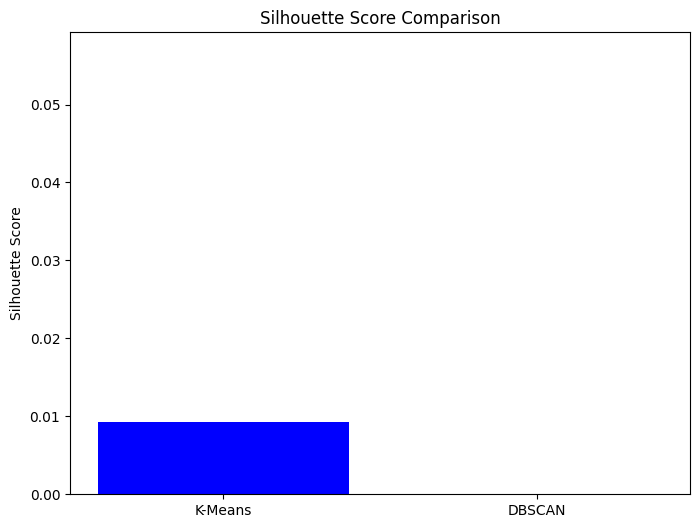

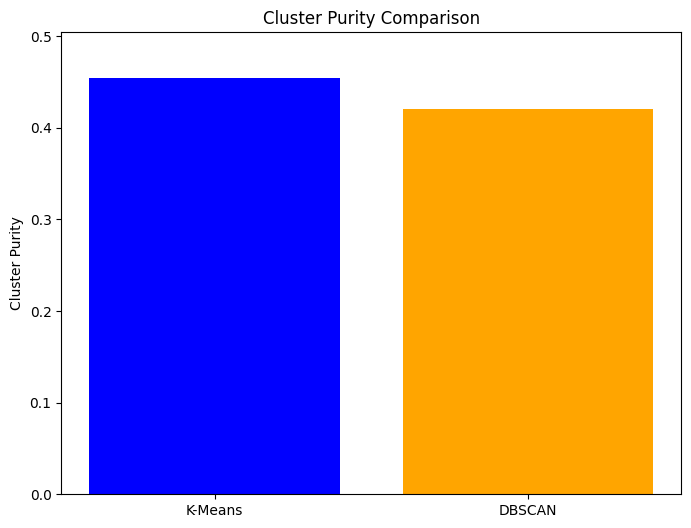

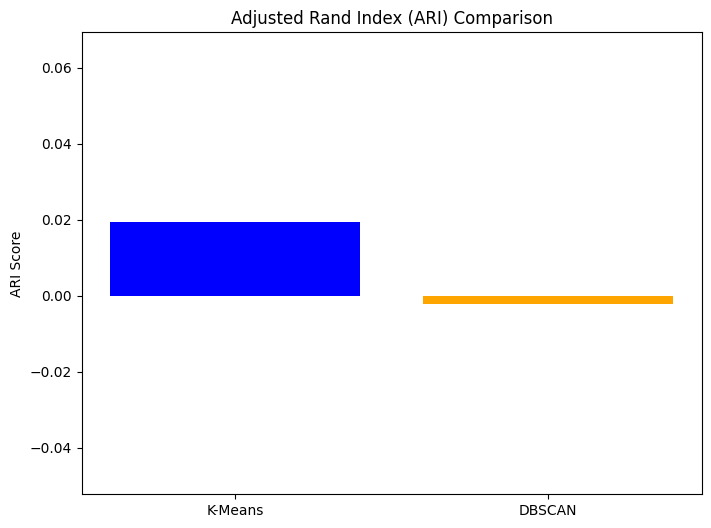

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Silhouette Score Comparison
models = ['K-Means', 'DBSCAN']
silhouette_scores = [kmeans_silhouette, dbscan_silhouette]

plt.figure(figsize=(8, 6))
plt.bar(models, silhouette_scores, color=['blue', 'orange'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.ylim(0, max(silhouette_scores) + 0.05)
plt.show()

# Cluster Purity Comparison
purity_scores = [kmeans_purity, dbscan_purity]

plt.figure(figsize=(8, 6))
plt.bar(models, purity_scores, color=['blue', 'orange'])
plt.title('Cluster Purity Comparison')
plt.ylabel('Cluster Purity')
plt.ylim(0, max(purity_scores) + 0.05)
plt.show()

# Adjusted Rand Index (ARI) Comparison
ari_scores = [kmeans_ari, dbscan_ari]

plt.figure(figsize=(8, 6))
plt.bar(models, ari_scores, color=['blue', 'orange'])
plt.title('Adjusted Rand Index (ARI) Comparison')
plt.ylabel('ARI Score')
plt.ylim(min(ari_scores) - 0.05, max(ari_scores) + 0.05)
plt.show()


### K-Means
**Better clustering performance overall**: K-Means performed better in terms of Silhouette Score, Purity, and ARI, though the scores are not particularly strong, indicating that the clusters are weakly defined and do not align closely with the sentiment labels.

**Potential improvement**: The low scores suggest that K-Means is not fully capturing the structure of the data, possibly due to the complex nature of the tweet content or because K-Means assumes spherical clusters, which might not be appropriate for the dataset.

### DBSCAN
**Struggles with noise and complex data**: DBSCAN's negative Silhouette Score and ARI suggest that the model is not finding clear clusters and is treating much of the data as noise or incorrectly assigning points to clusters. This is common with high-dimensional sparse data like TF-IDF vectors unless the parameters (eps and min_samples) are finely tuned.

**Challenges with the data**: DBSCAN seems to struggle with the tweet dataset, likely due to the nature of text data and the fact that DBSCAN performs better with low-dimensional data and clear density-based clusters, which might not exist in the dataset.


## Apply PCA Before K-Means and increate the number of clusters

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA before K-Means
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X.toarray())

# Re-run K-Means with the reduced data
kmeans_pca = KMeans(n_clusters=50, random_state=42)
train_df['kmeans_pca_cluster'] = kmeans_pca.fit_predict(X_reduced)

# Calculate metrics for K-Means with PCA
kmeans_pca_silhouette = silhouette_score(X_reduced, train_df['kmeans_pca_cluster'])
kmeans_pca_purity = calculate_purity('kmeans_pca_cluster')
kmeans_pca_ari = adjusted_rand_score(train_df['sentiment'], train_df['kmeans_pca_cluster'])

print(f"K-Means with PCA Silhouette Score: {kmeans_pca_silhouette}")
print(f"K-Means with PCA Purity: {kmeans_pca_purity}")
print(f"K-Means with PCA Adjusted Rand Index (ARI): {kmeans_pca_ari}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means with PCA Silhouette Score: 0.21943762704431988
K-Means with PCA Purity: 0.5226884028965467
K-Means with PCA Adjusted Rand Index (ARI): 0.020351373390068275


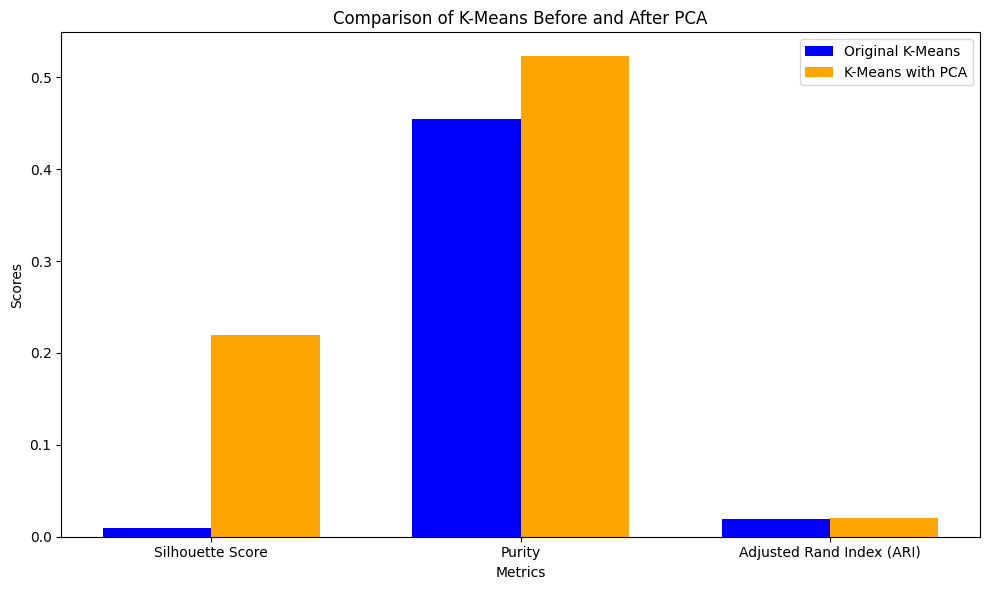

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics before and after improvement with PCA
metrics = ['Silhouette Score', 'Purity', 'Adjusted Rand Index (ARI)']
before_improvement = [kmeans_silhouette, kmeans_purity, kmeans_ari]
after_improvement_pca = [kmeans_pca_silhouette, kmeans_pca_purity, kmeans_pca_ari]

# Plot comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, before_improvement, bar_width, label='Original K-Means', color='blue')
plt.bar(index + bar_width, after_improvement_pca, bar_width, label='K-Means with PCA', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of K-Means Before and After PCA')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

plt.tight_layout()
plt.show()


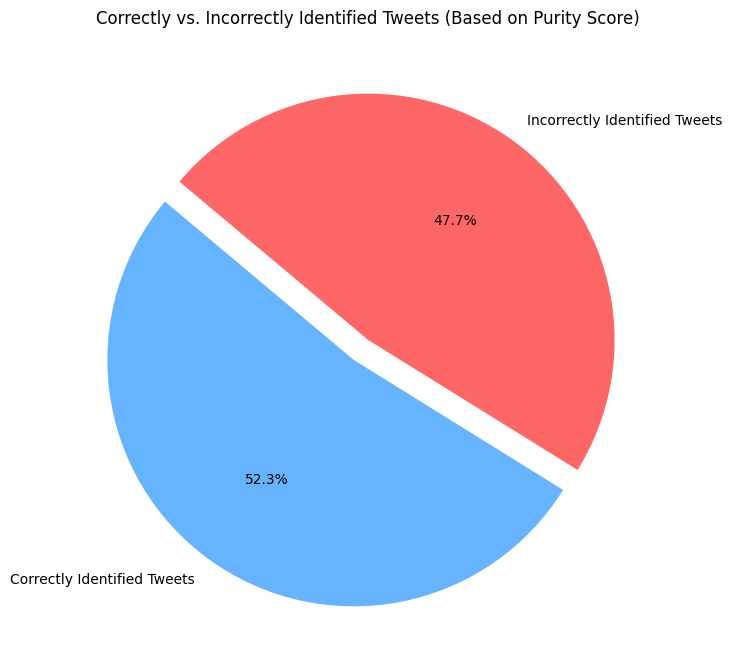

In [21]:
import matplotlib.pyplot as plt

# Given Purity score (from improved K-Means)
purity_score = kmeans_pca_purity

# Total number of tweets in the dataset
total_tweets = len(train_df)

correctly_identified_tweets = int(purity_score * total_tweets)
incorrectly_identified_tweets = total_tweets - correctly_identified_tweets

labels = ['Correctly Identified Tweets', 'Incorrectly Identified Tweets']
sizes = [correctly_identified_tweets, incorrectly_identified_tweets]
colors = ['#66b3ff', '#ff6666']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))  # explode the first slice
plt.title('Correctly vs. Incorrectly Identified Tweets (Based on Purity Score)')
plt.show()


Given the complexity of tweet data and the difficulty of unsupervised sentiment clustering, your model is performing moderately well. The Purity Score indicates that the model is doing a decent job at identifying sentiment in clusters, and the Silhouette Score shows that the clusters are relatively well-formed. However, the low ARI highlights that the alignment with the actual sentiment labels is still weak.